In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import math

In [21]:
path = 'Output'
#file_names = ['lyingN200.txt', 'lyingN400.txt', 'lyingN650.txt', 'standingN200.txt', 'standingN400.txt', 'standingN650.txt']
#file_names = ['standingN200.txt', 'bigCylinderd16.txt', 'bigCylinderd18.txt',  'bigCylinderd20.txt', 'bigCylinderd202.txt', 'bigCylinderd23.txt', 'bigCylinderd24.txt', 'standingN400.txt', 'bigCylinderd28.txt', 'bigCylinderd30.txt', 'bigCylinderd35.txt', 'bigCylinderd38.txt', 'standingN650.txt']

#file_names = ['lyingN200.txt', 'bigCylinderd16.txt', 'bigCylinderd18.txt',  'bigCylinderd20.txt', 'bigCylinderd202.txt', 'bigCylinderd23.txt', 'bigCylinderd24.txt', 'lyingN400.txt', 'bigCylinderd28.txt', 'bigCylinderd30.txt', 'bigCylinderd35.txt', 'bigCylinderd38.txt', 'lyingN650.txt']

#file_names = ['standingN200.txt', 'bigCylinderd16.txt', 'bigCylinderd18.txt',  'bigCylinderd20.txt', 'bigCylinderd202.txt', 'bigCylinderd23.txt', 'bigCylinderd24.txt', 'standingN400.txt', 'bigCylinderd28.txt']
#file_names = ['rod1d16.txt', 'rod1d18.txt', 'rod1d20.txt',  'rod1d25.txt']
#file_names = ['rod2d16.txt', 'rod2d18.txt', 'rod2d20.txt',  'rod2d25.txt']
file_names = ['rod3d20.txt', 'rod3d25.txt']

wrong_axis_files = ['bigCylinderd16.txt', 'bigCylinderd18.txt', 'bigCylinderd20.txt', 'bigCylinderd202.txt', 'bigCylinderd24.txt', 'bigCylinderd23.txt', 'bigCylinderd30.txt', 'bigCylinderd35.txt', 'bigCylinderd38.txt', 'bigCylinderd28.txt']


#file_names = ['petri1.txt', 'petri1l2.txt', 'petri5l2.txt']

#file_names = ['lyingN200.txt', 'lyingN400.txt', 'lyingN650.txt']
#file_names = ['standingN200.txt', 'standingN400.txt', 'standingN650.txt']


In [22]:
S1 = list()
S2 = list()
S3 = list()

density = list()
    

In [23]:
#Parse all data

for file_name in file_names:
    file = open(path + '/' + file_name)
    lines = [line.rstrip('\n') for line in file]
    
    N = int(lines[0].split(',')[0])
    Timesteps = int((len(lines)-1)/N)
    
    #Get HPB size
    line = lines[2]
    line = line.replace('(','')
    line = line.replace(')','')
    elements = line.split(',')
    w = float(elements[3]) * 2
    l = float(elements[4]) * 2
    t = float(elements[5]) * 2
        
    #Get Order parameters and cylinder size
    if file_name in wrong_axis_files:
        line = lines[1 + (N+1)*(Timesteps-1)]
        #line = line.replace('(','')
        #line = line.replace(')','')
        elements = line.split(',')
        S1.append(float(elements[5]))
        S2.append(float(elements[6]))
        S3.append(float(elements[4]))
        r = float(elements[1])
        h =  float(elements[2])
    else:
        line = lines[1 + (N+1)*(Timesteps-1)]
        #line = line.replace('(','')
        #line = line.replace(')','')
        elements = line.split(',')
        S1.append(float(elements[4]))
        S2.append(float(elements[5]))
        S3.append(float(elements[6]))
        r = float(elements[1])
        h =  float(elements[2])
        
    #Calculate density
    cylinderVolume = r**2 * math.pi * h
    particleVolume = w * l * t
    density.append(particleVolume * N / cylinderVolume)

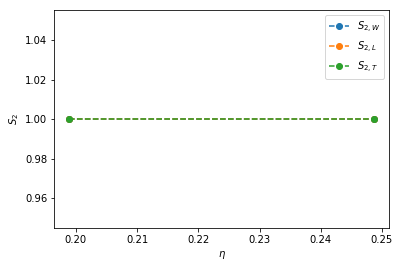

In [20]:
plt.plot(density, S1, '--o')
plt.plot(density, S2, '--o')
plt.plot(density, S3, '--o')

plt.ylabel("$S_2$")
plt.xlabel("$\eta$")

plt.legend(['$S_{2,W}$', '$S_{2,L}$', '$S_{2,T}$'])

plt.savefig('rod3d.pdf')

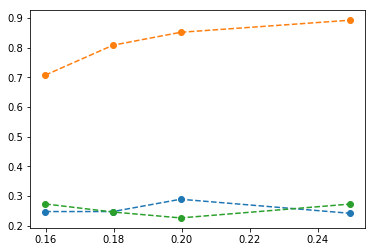

In [6]:
plt.plot(density, S1, '--o')
plt.plot(density, S2, '--o')
plt.plot(density, S3, '--o')

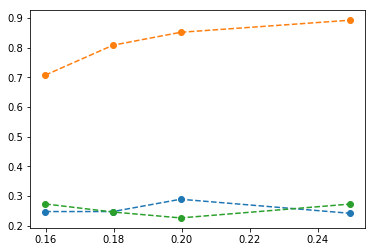

In [7]:
plt.plot(density, S1, '--o')
plt.plot(density, S2, '--o')
plt.plot(density, S3, '--o')